# **Tarea 1**

El problema de los multi-armed bandits es una simplificación clave dentro del campo del aprendizaje por refuerzo (Reinforcement Learning), que permite explorar conceptos fundamentales como el balance entre exploración y explotación. Su nombre proviene de la analogía con las máquinas tragamonedas (slot machines), donde cada brazo representa una acción con una distribución de recompensas desconocida. El objetivo es maximizar la recompensa acumulada a través de iteraciones, aprendiendo qué acción es la más óptima.

A diferencia del aprendizaje supervisado, el aprendizaje por refuerzo depende de feedback evaluativo, que no proporciona directamente la mejor acción a tomar, sino una evaluación de las acciones realizadas. Esto contrasta con el feedback instructivo, utilizado en tareas supervisadas, donde se indica la acción correcta independientemente de lo que el agente haya elegido.

Este aspecto evaluativo introduce la necesidad de:

1. Exploración: Probar acciones nuevas para descubrir recompensas potenciales.
2. Explotación: Seleccionar acciones previamente evaluadas como óptimas para maximizar la recompensa acumulada.

El problema de los multi-armed bandits aborda esta tensión en su forma más elemental, evitando la complejidad asociativa y sin incluir múltiples estados en el entorno.

## _Punto 1:_

Para el problema de multi-armed bandit, implemente un banco de pruebas (testbed) similar al considerado en clase y en el libro de texto, pero con 15 acciones con $𝑞^∗(𝑎_𝑘)$ generadas aleatoriamente de acuerdo a una distribución normal con media 10 y varianza 4, y cada acción con varianza de 2.
Resuelva el problema de maximizar la suma de recompensas en un horizonte de tiempo de 5000 iteraciones con los siguientes algoritmos (implementados por usted):

- ϵ-greedy con recompensa promedio.
- Gradient Bandit.

    Para cada caso ajuste apropiadamente los parámetros requeridos (𝛼,𝜖), y grafique el desempeño de los algoritmos en términos de recompensa recibida y porcentaje de iteraciones en que se selecciona la acción óptima.

### Implementación ϵ-greedy

Se realzia la importación de las librerías requeridas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

El enunciado del problema, da los siguientes valores para la parametrización del problema:

In [2]:
k = 15 # Número de acciones
promedio = 10 # promedio q*(ak)
varianza_r = 4 # varainza q*(ak)
var_recompensa = 2 # varianza de las recompensas
iteraciones = 5000 # numero de iteraciones
num_experimentos = 1000 # número de experimentos

Se define una función para generar los valores verdaderos $q^*(a)$ para cada una de las $k$ acciones en el problema de 𝜖-greedy. Estos valores representan las recompensas esperadas de cada acción y son fundamentales para evaluar el desempeño de los algoritmos de selección de acciones.

Los valores se generan a partir de una distribución normal:

$$
q^*(a) \sim \mathcal{N}(\mu, \sigma^2)
$$

donde:

- $\mu$ es la media de la distribución de recompensas esperadas.
- $\sigma^2$ es la varianza, que define la dispersión de los valores verdaderos.

Esta función devuelve un array de tamaño $k$ con los valores $q^*(a)$. Su propósito es simular las recompensas esperadas de cada acción, es decir, el "valor real" de cada brazo en el multi-armed bandit.

Cada ejecución de la función genera un conjunto diferente de valores $q^*(a)$, permitiendo simular distintos entornos de prueba para el aprendizaje del agente.

Es de considerar, que al usar la función "numpy.random.normal" de la librería de python numpy, esta usa la desviación estandar, por lo que se apica la transformación de la varianza dada por el ejercicio para el uso de esta función.

In [6]:
def valores_verdaderos_q():
  return np.random.normal(promedio, np.sqrt(varianza_r), k)

Se define la función que genera valores de recompensa para el testbed. Esta función genera la recompensa que recibe el agente al seleccionar una acción en el multi-armed bandit. La recompensa se obtiene a partir de una distribución normal, con una media basada en el valor verdadero 𝑞∗(𝑎) de la acción tomada y la varianza definida en cada caso.

In [7]:
def valores_recompensa(q_valores_verdaderos, accion_tomada):
  return np.random.normal(q_valores_verdaderos[accion_tomada], np.sqrt(var_recompensa))

Se realiza la implementación del algoritmo ϵ-greedy, donde con probabilidad ϵ, se elige una acción aleatoria (exploración), y con probabilidad 1 - ϵ, se elige la acción con el mayor valor estimado (explotación).

Se inicializan los arreglos para almacenar la recompensa promedio y el número de veces que se elige la acción óptima a lo largo de las iteraciones.

$$
\text{recompensa\_promedio} = \mathbf{0}_{\text{iteraciones}}, \quad \text{accion\_optima\_recuento} = \mathbf{0}_{\text{iteraciones}}
$$

Se generan los valores verdaderos $q^*(a)$ para cada una de las $k$ acciones, los cuales se extraen de una distribución normal:

$$
q^*(a) \sim \mathcal{N}(\mu, \sigma^2)
$$

donde:
- $\mu$ es la media establecida (en este caso 10),
- $\sigma^2$ es la varianza de la distribución de las recompensas verdaderas.

En cada iteración, el algoritmo decide si explora o explota con base en el parámetro $\epsilon$:

$$
a_t =
\begin{cases} 
\text{acción aleatoria}, & \text{si } \text{rand()} < \epsilon \quad (\text{exploración}) \\
\arg\max_a Q(a), & \text{caso contrario} \quad (\text{explotación})
\end{cases}
$$

donde:
- $\text{rand()}$ es un número aleatorio uniformemente distribuido en [0,1).
- $Q(a)$ es el valor estimado de la acción $a$ basado en recompensas previas.

Después de seleccionar una acción $a_t$, se obtiene la recompensa real a partir de una distribución normal centrada en el valor verdadero $q^*(a_t)$:

$$
R_t \sim \mathcal{N}(q^*(a_t), \sigma_{\text{recompensa}}^2)
$$

donde $\sigma_{\text{recompensa}}^2$ es la varianza de las recompensas para cada acción.

El valor estimado de la acción seleccionada se actualiza usando la siguiente ecuación de promediado exponencial:

$$
Q_{t+1}(A_t) = Q_t(A_t) + \alpha \left( R_t - Q_t(A_t) \right)
$$

donde:
- $\alpha$ es la tasa de aprendizaje, la cual puede ser variable ($\frac{1}{n}$) en el caso estacionario o constante en el caso no estacionario.
- $(R_t - Q_t(A_t))$ representa el error de estimación entre la recompensa obtenida y la estimación actual.

Después de ejecutar el experimento $N$ veces, se obtiene el promedio de la recompensa

$$
\bar{R}_t = \frac{1}{N} \sum_{i=1}^{N} R_t^{(i)}
$$

y el porcentaje de selección de la acción óptima:

$$
\bar{P}_t = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1} \{A_t^{(i)} = a^*\}
$$

donde:
- $\bar{R}_t$ es la recompensa promedio en el tiempo $t$.
- $\bar{P}_t$ es el porcentaje de veces que se seleccionó la acción óptima $a^*$.
- $\mathbb{1} \{A_t^{(i)} = a^*\}$ es una función indicadora que toma el valor 1 si se seleccionó la mejor acción y 0 en caso contrario.

Esta aproximación permite encontrar un balance entre exploración y explotación.

In [5]:
def epsilon_greedy(epsilon, alpha):
    # Inicialización
    recompensa_promedio = np.zeros(iteraciones) # Guarda la recompensa promedio en cada iteración.
    accion_optima_recuento = np.zeros(iteraciones) # Guarda el número de veces que se elige la acción óptima.

    # Se generan los valores verdaderos 𝑞∗(𝑎) de las 15 acciones
    for _ in range(num_experimentos):
        q_valores_verdaderos = valores_verdaderos_q()
        q_estimado = np.zeros(k)
        accion_optima = np.argmax(q_valores_verdaderos)
        
        for t in range(iteraciones):
            # Selección de acción
            if np.random.rand() < epsilon:
                accion = np.random.choice(k)  # Exploración: se elige una acción al azar
            else:
                accion = np.argmax(q_estimado)  # Explotación: se elige la mejor acción conocida

            # Generar recompensa y actualizar estimado
            recompensa = valores_recompensa(q_valores_verdaderos, accion)
            q_estimado[accion] += alpha * (recompensa - q_estimado[accion])

            # Actualizar recompensas promedio
            recompensa_promedio[t] += recompensa
            if accion == accion_optima:
                accion_optima_recuento[t] += 1

    # Se calcula el promedio de recompensas y porcentaje de selección de la acción óptima tras ejecutar 1000 experimentos.
    recompensa_promedio /= num_experimentos
    accion_optima_recuento /= num_experimentos

    return recompensa_promedio, accion_optima_recuento

Se definen valores de alpha y epsilon para contrastar en el testbed

In [6]:
alphas = [0.1, 0.5]  # Diferentes tasas de aprendizaje
epsilons = [0, 0.1, 0.01] # en esta parte se pueden cambiar los valores de epsilon

Se ejecutan los experimentos para cada valor de alpha y epsilon, luego se almacenan los resultados. Esta función ejecuta el algoritmo 𝜖-greedy para todas las combinaciones posibles de los valores de 𝛼 (tasa de aprendizaje) y 𝜖 (tasa de exploración), almacenando los resultados en un diccionario.

In [7]:
def obtener_resultados(alphas, epsilons):
    res = {}
    for alpha in alphas:
        for epsilon in epsilons:
            key = (alpha, epsilon)  # Se crea una clave única para cada combinación de parámetros 𝛼 y 𝜖
            res[key] = epsilon_greedy(epsilon, alpha)  # Genera resultados para cada combinación
    return res

resultados = obtener_resultados(alphas, epsilons)

Se realizán las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones

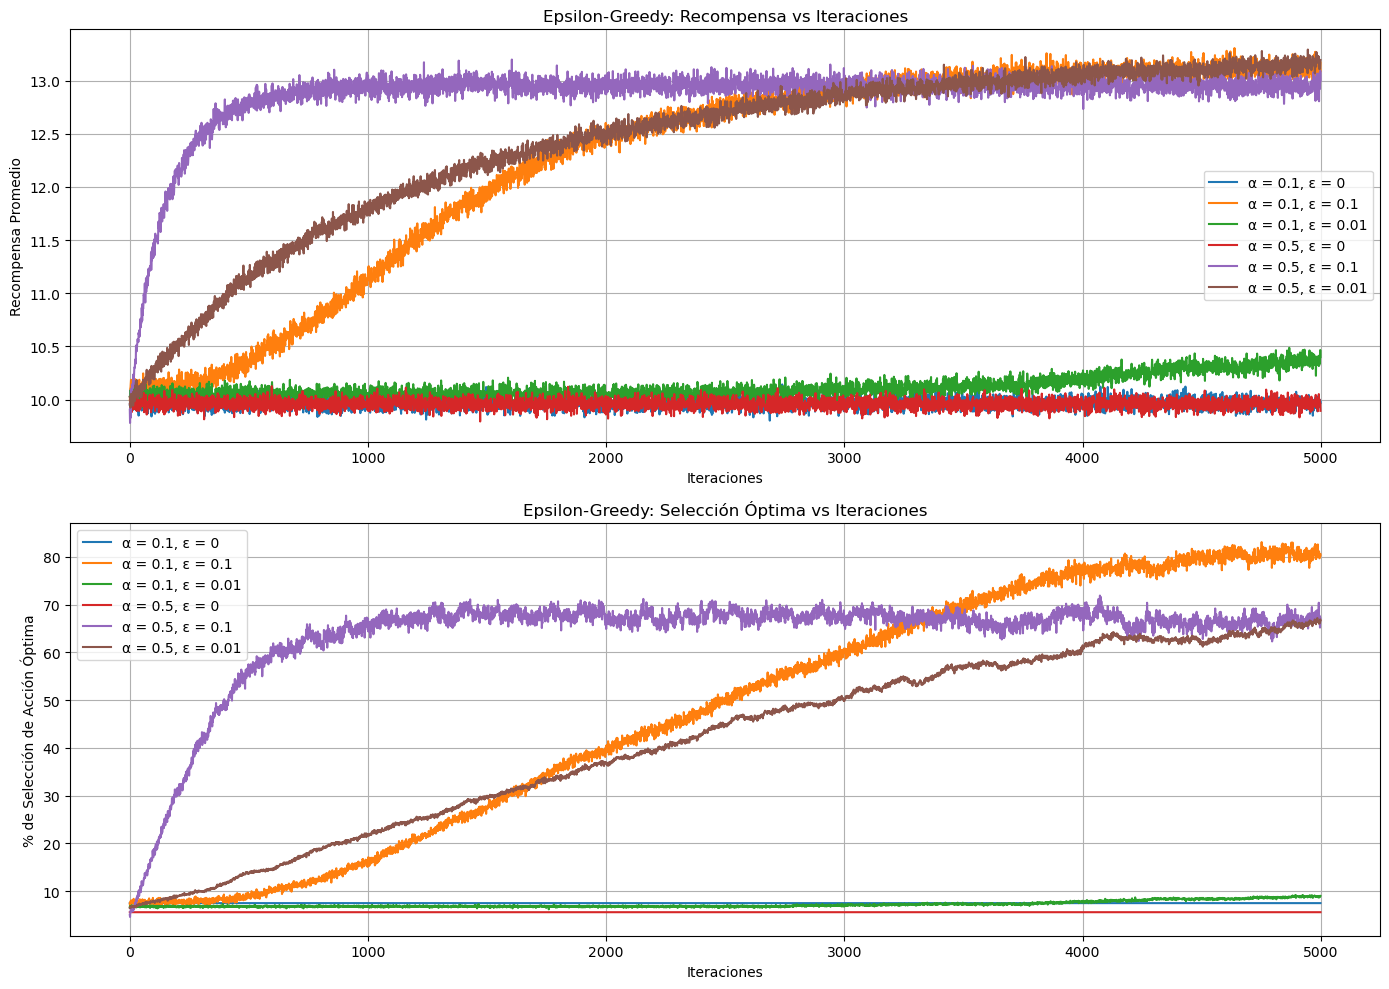

In [8]:
plt.figure(figsize=(14, 10))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for (alpha, epsilon), (recompensa, _) in resultados.items():
    plt.plot(recompensa, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for (alpha, epsilon), (_, porcentaje_optimo) in resultados.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

### Implementación - Gradient Bandit

El algoritmo Gradient Bandit es un método basado en ascenso de gradiente estocástico para resolver problemas de multi-armed bandits, el cual no usa estimaciones directas de valores de acción como 𝜖-greedy, sino que mantiene una preferencia relativa $𝐻_𝑡(𝑎)$ para cada acción, actualizándola en función de las recompensas obtenidas. La selección de acciones se realiza mediante una distribución softmax, donde la probabilidad de elegir una acción está determinada por la función exponencial de sus preferencias relativas. Tras recibir una recompensa 𝑅𝑡, las preferencias se ajustan de manera que aumentan para acciones seleccionadas con recompensas superiores al baseline y disminuyen para las demás, ayudando a estabilizar el aprendizaje y mejorar la convergencia. El uso del baseline, que es el promedio de recompensas obtenidas hasta el tiempo 𝑡, reduce la varianza y permite que el algoritmo aprenda de manera más eficiente.

Se importan las librerías requeridas

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Se declaran las variables contempladas para el problema

In [10]:
k = 15  # Número de acciones
media_q = 10  # Media de q_*(a_k)
varianza_q = 4  # Varianza de q_*(a_k)
varianza_recompensa = 2  # Varianza de las recompensas
iteraciones = 5000  # Número de iteraciones
repeticiones = 1000  # Número de experimentos

Se define una función para generar los valores verdaderos de recompensa esperada para cada una de las $k$ acciones en el problema de Gradient Bandit. Estos valores, denotados como $q^*(a)$, representan la recompensa media real de cada acción y son utilizados como referencia en los experimentos.

Los valores se generan siguiendo una distribución normal:

$$
q^*(a) \sim \mathcal{N}(\mu, \sigma^2)
$$

donde:

- $\mu$ es la media de la distribución de recompensas esperadas.
- $\sigma^2$ representa la varianza, controlando la dispersión de los valores verdaderos.

Este enfoque permite modelar la incertidumbre en la recompensa esperada de cada acción, facilitando la simulación de entornos no estacionarios en multi-armed bandits.


In [11]:
def generar_valores_q():
    return np.random.normal(media_q, np.sqrt(varianza_q), k)

Se define una función para generar recompensa para una acción, esta función simula la recompensa observada cuando el agente selecciona una acción específica en el problema de gradient bandit. Se basa en el valor real de la acción elegida pero introduce una variabilidad aleatoria en la recompensa.

In [12]:
def generar_recompensa(q_verdadero, accion):
    return np.random.normal(q_verdadero[accion], np.sqrt(varianza_recompensa))

Se define una función para la implementación del algoritmo Gradient Bandit, este es el método de selección de acciones basado en el ascenso de gradiente estocástico (SGD) con la estrategia softmax. Este algoritmo no mantiene estimaciones directas de valores de acción como en ε-greedy, sino que actualiza preferencias para cada acción y calcula sus probabilidades de selección en función de una distribución softmax.

La probabilidad de seleccionar la acción (a) en el tiempo (t) es:

$$
\pi_t(a) = \frac{e^{H_t(a)}}{\sum_{j=1}^{k} e^{H_t(j)}}
$$

donde:

- $H_t(a)$ representa la preferencia de la acción $a$ en el tiempo $t$.
- $\pi_t(a)$ es la probabilidad de seleccionar la acción $a$ en el tiempo $t$, determinada por softmax.

Para ello, se inicializan los arreglos para almacenar la recompensa promedio y el número de veces que se elige la acción óptima a lo largo de las iteraciones:

$$
\text{recompensa\_promedio} = \mathbf{0}_{\text{iteraciones}}, \quad \text{accion\_optima\_recuento} = \mathbf{0}_{\text{iteraciones}}
$$

Se generan los valores verdaderos de recompensa $q^*(a)$ para cada una de las $k$ acciones:

$$
q^*(a) \sim \mathcal{N}(\mu, \sigma^2)
$$

donde:
- $\mu$ es la media establecida de las recompensas.
- $\sigma^2$ es la varianza de la distribución de los valores verdaderos.

Cada acción inicializa su preferencia en cero:

$$
H(a) = 0, \quad \forall a \in \{1, \dots, k\}
$$

Las probabilidades iniciales de selección de cada acción son uniformes:

$$
\pi(a) = \frac{1}{k}, \quad \forall a
$$

El baseline se inicializa en cero:

$$
\text{baseline} = 0
$$

En cada iteración $t$, la acción se selecciona según la distribución softmax, que asigna probabilidades a cada acción en función de sus preferencias:

$$
\pi_t(a) = \frac{e^{H_t(a)}}{\sum_{j=1}^{k} e^{H_t(j)}}
$$

La acción $A_t$ se elige de acuerdo con la distribución $\pi_t$:

$$
A_t \sim \pi_t(a)
$$

Después de seleccionar la acción $A_t$, la recompensa real se obtiene a partir de una distribución normal centrada en su valor verdadero:

$$
R_t \sim \mathcal{N}(q^*(A_t), \sigma_{\text{recompensa}}^2)
$$

donde $\sigma_{\text{recompensa}}^2$ es la varianza de las recompensas.

El baseline (línea base) se actualiza utilizando el promedio incremental:

$$
\bar{R}_t = \bar{R}_{t-1} + \frac{1}{t} (R_t - \bar{R}_{t-1})
$$

Esto permite que el algoritmo tenga en cuenta la recompensa promedio a lo largo del tiempo.

Las preferencias se actualizan mediante el ascenso de gradiente estocástico basado en la diferencia entre la recompensa obtenida y el baseline:

Para la acción seleccionada $A_t$:
$$
H_{t+1}(A_t) = H_t(A_t) + \alpha (R_t - \bar{R}_t) (1 - \pi_t(A_t))
$$

Para las demás acciones $a \neq A_t$:
$$
H_{t+1}(a) = H_t(a) - \alpha (R_t - \bar{R}_t) \pi_t(a)
$$

donde:
- $\alpha$ es la tasa de aprendizaje (learning rate).
- $R_t - \bar{R}_t$ representa el error de recompensa en relación con el baseline.
- $1 - \pi_t(A_t)$ y $\pi_t(a)$ ajustan la magnitud del cambio para la acción seleccionada y las restantes.

Después de actualizar las preferencias, se recalculan las probabilidades de selección de cada acción:

$$
\pi_{t+1}(a) = \frac{e^{H_{t+1}(a)}}{\sum_{j=1}^{k} e^{H_{t+1}(j)}}
$$

Esto permite que las acciones con mayores preferencias tengan una probabilidad más alta de ser elegidas en las siguientes iteraciones.

Después de ejecutar el experimento $N$ veces, se obtiene el promedio de la recompensa:

$$
\bar{R}_t = \frac{1}{N} \sum_{i=1}^{N} R_t^{(i)}
$$

 y el porcentaje de selección de la acción óptima:

$$
\bar{P}_t = \frac{1}{N} \sum_{i=1}^{N} \mathbb{1} \{A_t^{(i)} = a^*\}
$$

donde:
- $\bar{R}_t$ es la recompensa promedio en el tiempo $t$.
- $\bar{P}_t$ es el porcentaje de veces que se seleccionó la acción óptima $a^*$.
- $\mathbb{1} \{A_t^{(i)} = a^*\}$ es una función indicadora que toma el valor 1 si se seleccionó la mejor acción y 0 en caso contrario.

Este algoritmo garantiza que las acciones con mayores recompensas sean favorecidas, ajustando dinámicamente las probabilidades mediante un gradiente de ascenso estocástico, lo que permite una mejor exploración-explotación en comparación con métodos como 𝜖-greedy, este método no necesita explorar explícitamente, ya que la selección de acciones se hace de manera probabilística con softmax. Además, el uso del baseline ayuda a reducir la varianza en las actualizaciones y mejora la estabilidad del aprendizaje.

In [13]:
def gradient_bandit(alpha):
    recompensa_promedio = np.zeros(iteraciones)
    accion_optima_recuento = np.zeros(iteraciones)

    for _ in range(repeticiones):
        q_verdadero = generar_valores_q()  # Generar nuevo testbed
        accion_optima = np.argmax(q_verdadero)
        H = np.zeros(k)  # Preferencias iniciales
        pi = np.ones(k) / k  # Probabilidades iniciales (uniformes)
        baseline = 0  # Valor inicial de la línea base

        for t in range(iteraciones):
            # Se Selecciona una acción basada en softmax
            accion = np.random.choice(np.arange(k), p=pi)
            
            # Generar recompensa para la acción seleccionada
            recompensa = generar_recompensa(q_verdadero, accion)
            
            # Actualizar línea base
            baseline += (recompensa - baseline) / (t + 1)
            
            # Actualizar preferencias
            for a in range(k):
                if a == accion:
                    H[a] += alpha * (recompensa - baseline) * (1 - pi[a])
                else:
                    H[a] -= alpha * (recompensa - baseline) * pi[a]
            
            # Actualizar probabilidades usando softmax
            exp_H = np.exp(H)
            pi = exp_H / np.sum(exp_H)
            
            # Registrar resultados
            recompensa_promedio[t] += recompensa
            if accion == accion_optima:
                accion_optima_recuento[t] += 1

    recompensa_promedio /= repeticiones
    accion_optima_recuento /= repeticiones
    return recompensa_promedio, accion_optima_recuento

Se definen valores de alpha y epsilon para contrastar en el testbed

In [14]:
alphasBandits = [0.1, 0.3, 0.5]

Se define una función para ejecutar el algoritmo Gradient Bandit en relación a los valores de alpha definidos. Esta función se encarga de ejecutar el algoritmo Gradient Bandit para una serie de valores de $\alpha$ (learning rate) y almacenar los resultados en un diccionario.

In [15]:
def obtener_resultados_gradient_bandit(alphas):
    resultados = {}
    for alpha in alphas:
        resultados[alpha] = gradient_bandit(alpha)
    return resultados

resultados_gradient = obtener_resultados_gradient_bandit(alphasBandits)

Se realizán las graficas del testbed para contrastar los resultados de recompensa promedio y selección de acción optima durante las iteraciones

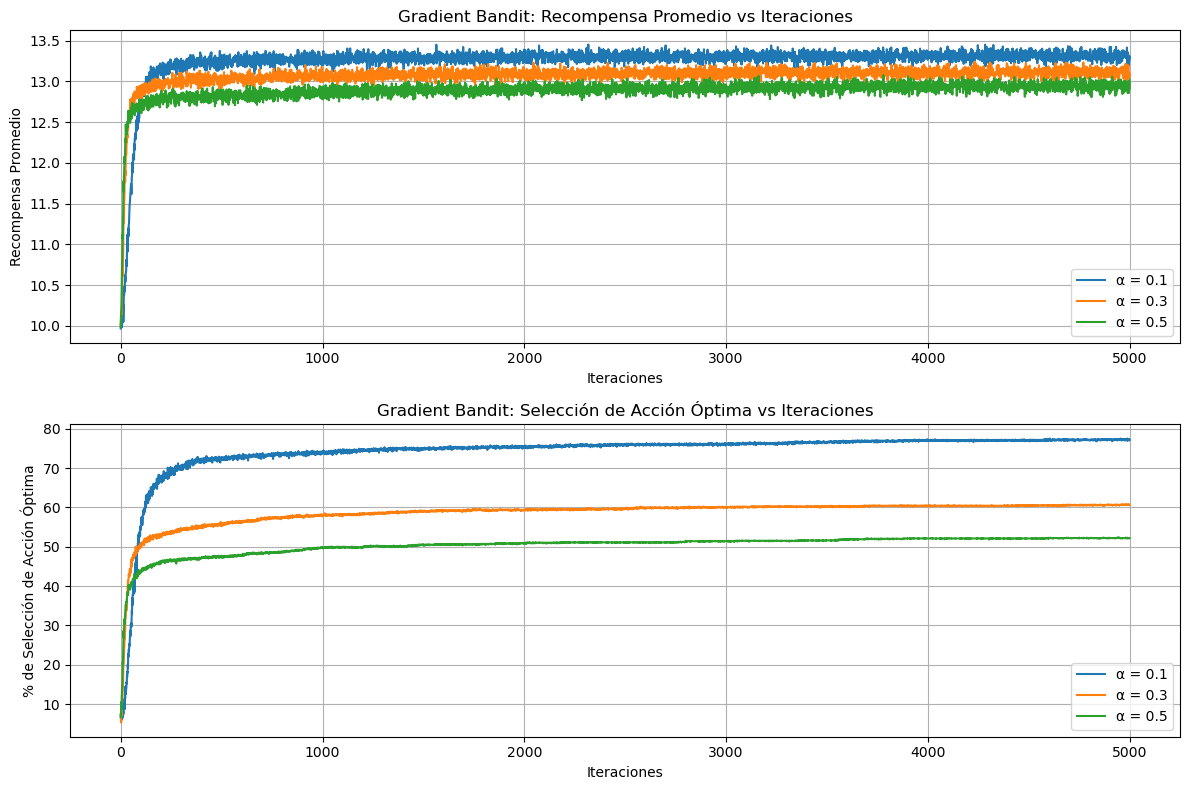

In [16]:
plt.figure(figsize=(12, 8))

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for alpha, (recompensa, _) in resultados_gradient.items():
    plt.plot(recompensa, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Gradient Bandit: Recompensa Promedio vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for alpha, (_, porcentaje_optimo) in resultados_gradient.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Gradient Bandit: Selección de Acción Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

## _Punto 2:_

Repita el problema anterior pero ahora con cada acción con varianza 4.

### Implementación  ϵ-greedy

El enunciado del problema, da los siguientes valores para la parametrización del problema:

In [17]:
var_recompensa = 4 # varianza de las recompensas

Se ejecutan los experimentos para cada valor de epsilon y almacenar resultados

In [18]:
resultados2 = obtener_resultados(alphas, epsilons)

Se realizán las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones

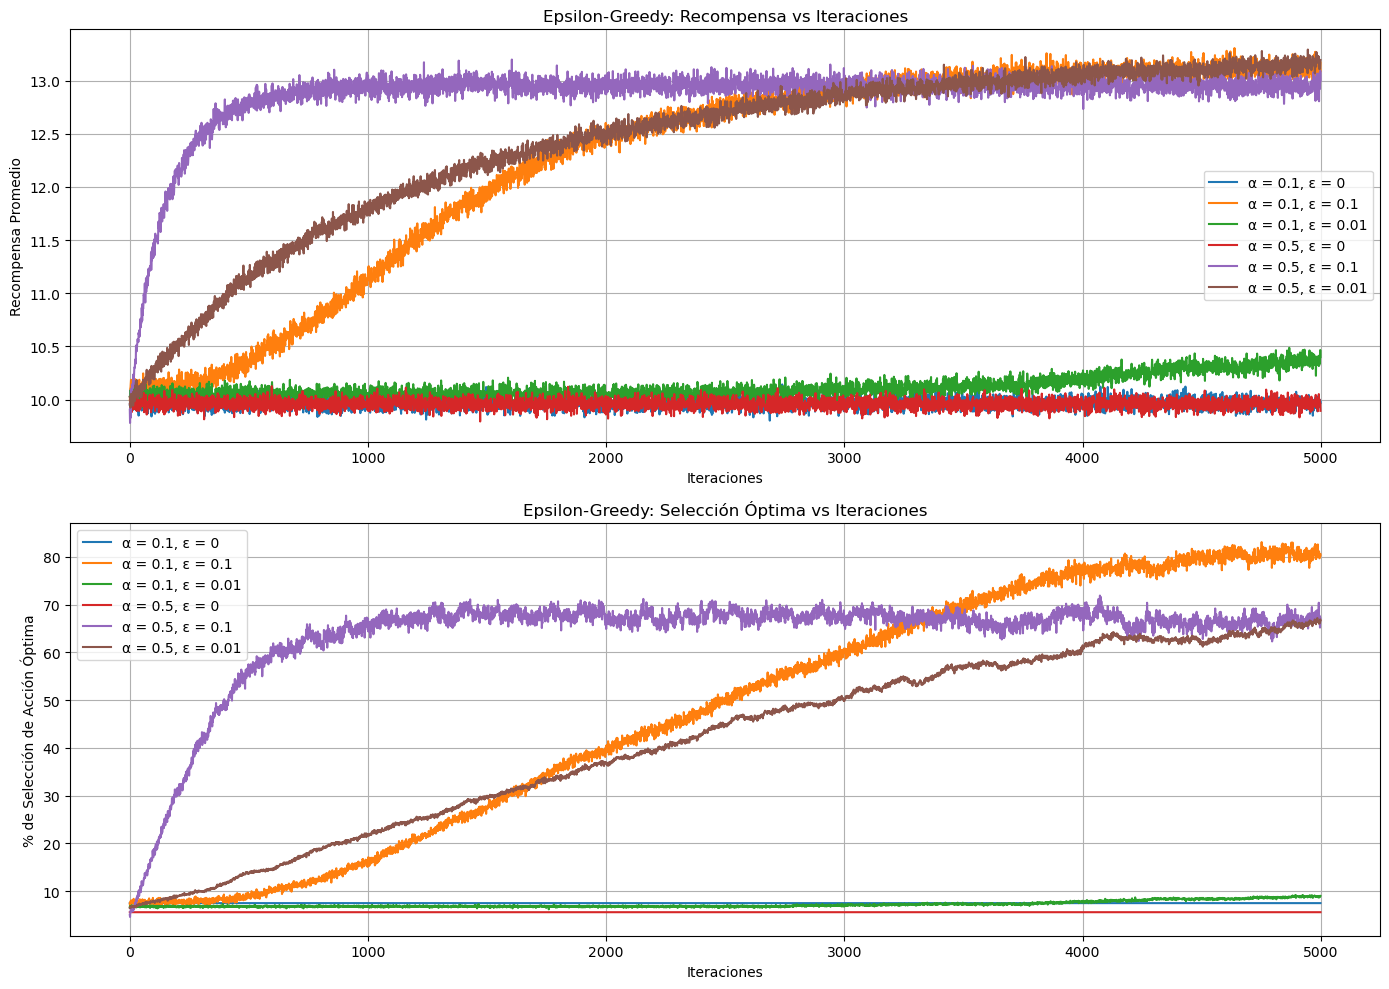

In [19]:
plt.figure(figsize=(14, 10))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for (alpha, epsilon), (recompensa, _) in resultados.items():
    plt.plot(recompensa, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for (alpha, epsilon), (_, porcentaje_optimo) in resultados.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

Para contrastar los resultados, entre los datos obtenidos en el punto 1 y el punto 2 con ϵ-greedy, se tiene:

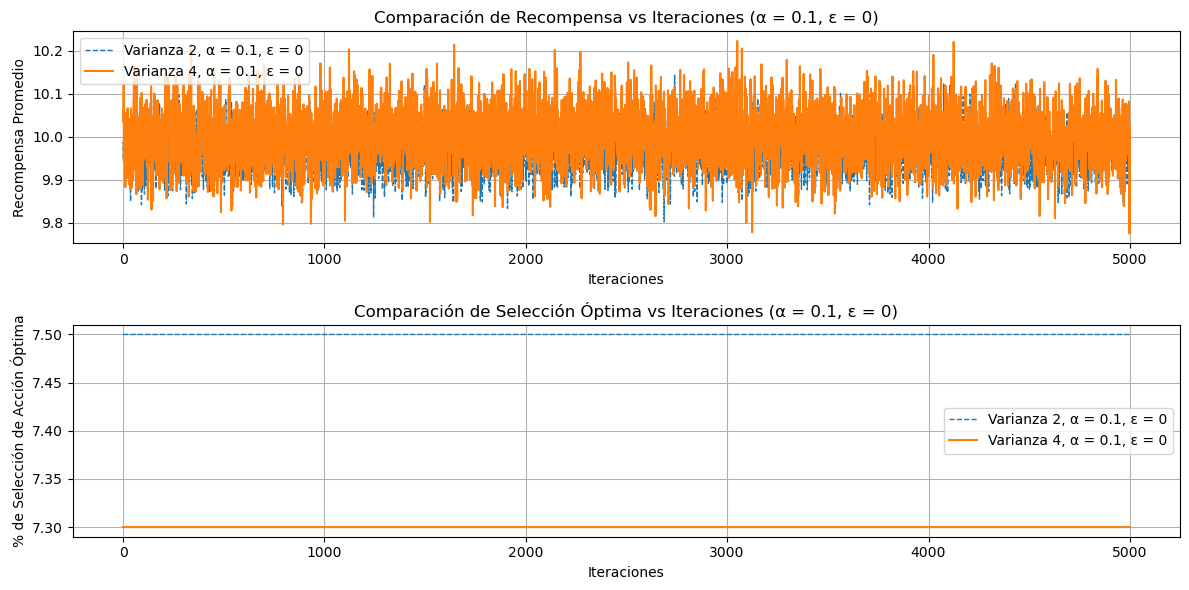

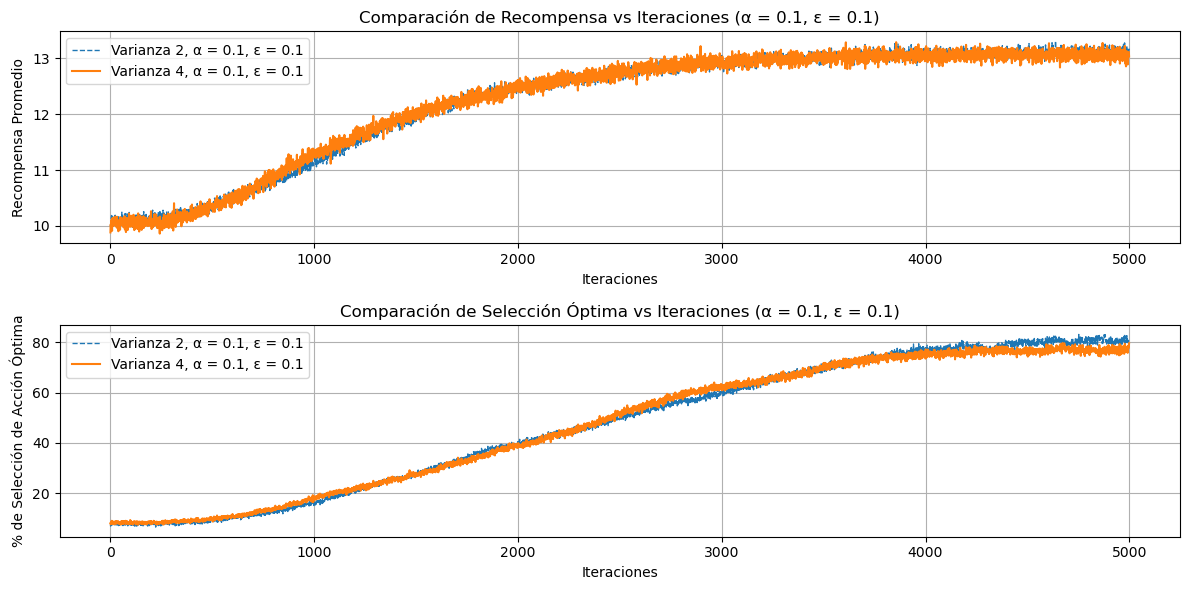

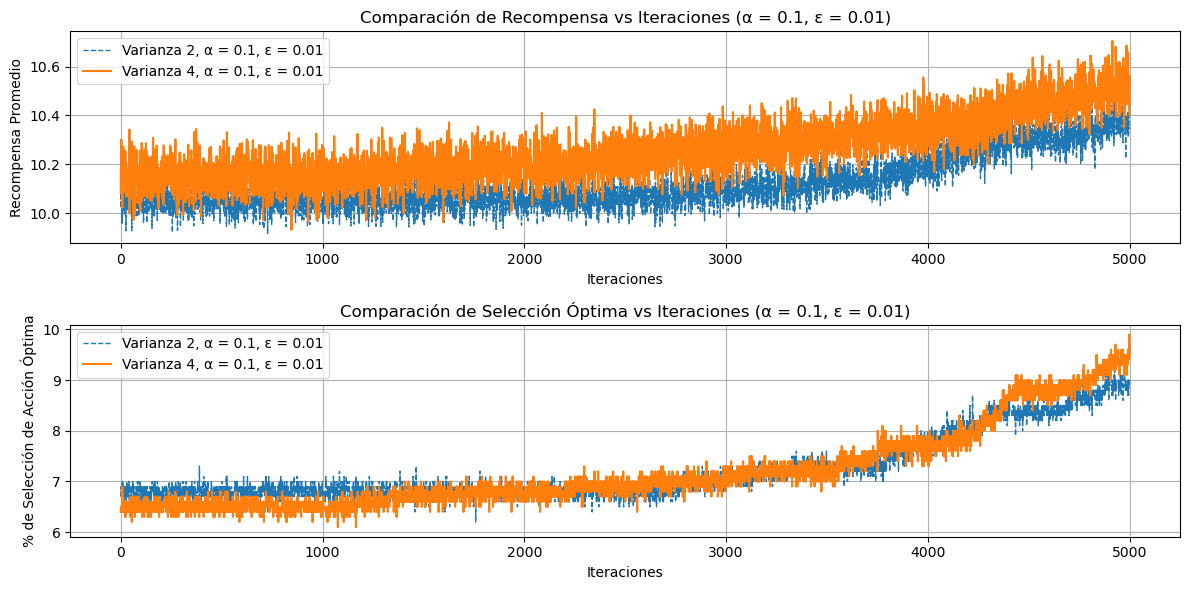

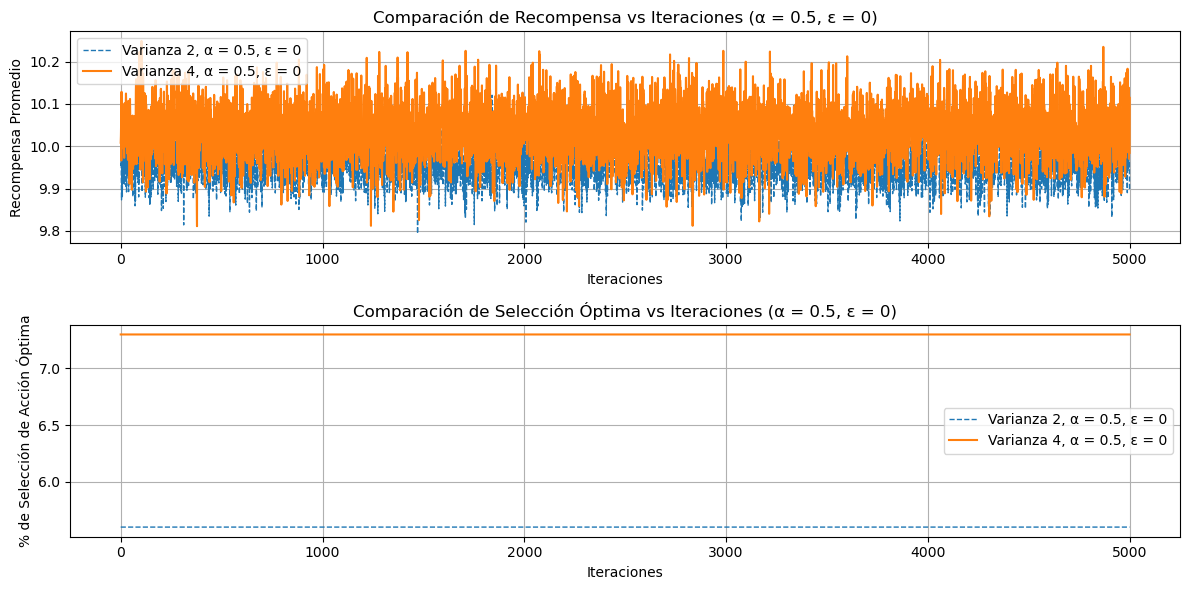

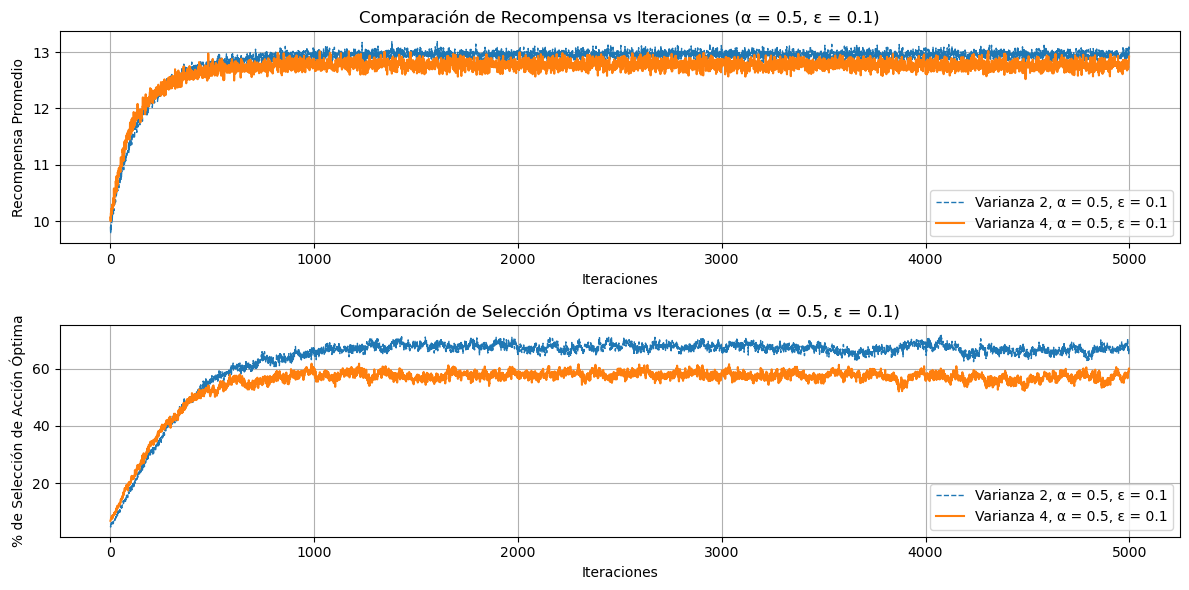

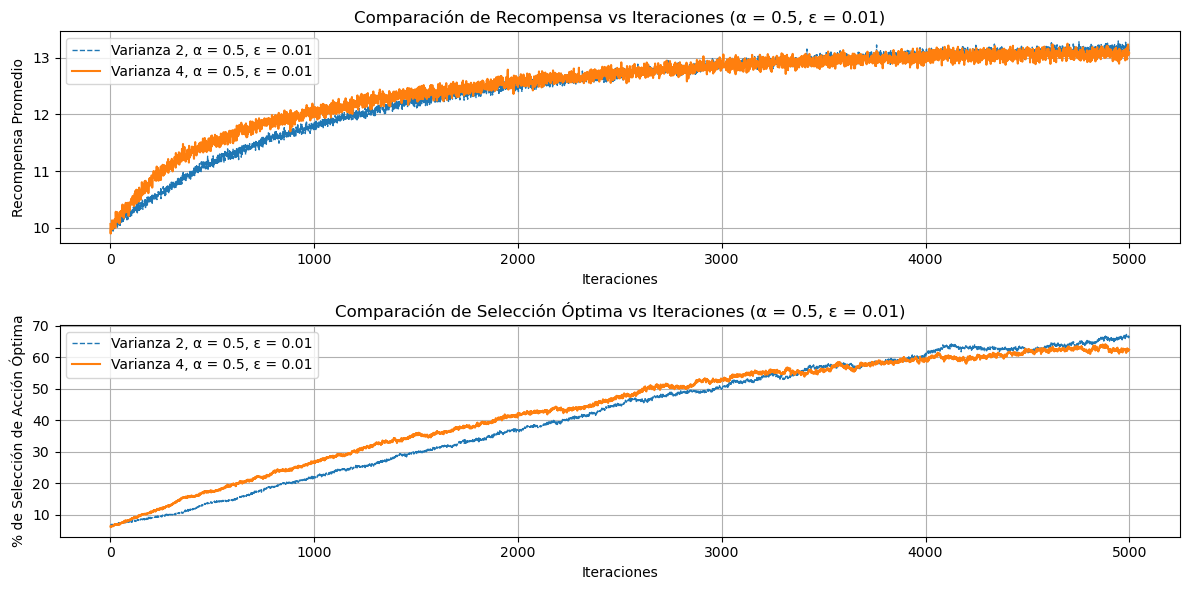

In [20]:
for (alpha, epsilon) in resultados.keys():
    plt.figure(figsize=(12, 6))
    
    # Subgráfica 1: Comparación de recompensa promedio
    plt.subplot(2, 1, 1)
    plt.plot(resultados[(alpha, epsilon)][0], '--', label=f'Varianza 2, α = {alpha}, ε = {epsilon}', linewidth=1)
    plt.plot(resultados2[(alpha, epsilon)][0], label=f'Varianza 4, α = {alpha}, ε = {epsilon}', linewidth=1.5)
    plt.xlabel('Iteraciones')
    plt.ylabel('Recompensa Promedio')
    plt.title(f'Comparación de Recompensa vs Iteraciones (α = {alpha}, ε = {epsilon})')
    plt.legend(loc='best')
    plt.grid(True)
    
    # Subgráfica 2: Comparación de selección óptima
    plt.subplot(2, 1, 2)
    plt.plot(resultados[(alpha, epsilon)][1] * 100, '--', label=f'Varianza 2, α = {alpha}, ε = {epsilon}', linewidth=1)
    plt.plot(resultados2[(alpha, epsilon)][1] * 100, label=f'Varianza 4, α = {alpha}, ε = {epsilon}', linewidth=1.5)
    plt.xlabel('Iteraciones')
    plt.ylabel('% de Selección de Acción Óptima')
    plt.title(f'Comparación de Selección Óptima vs Iteraciones (α = {alpha}, ε = {epsilon})')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Para evidenciar los resultados de forma tabular, se implementa:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def preparar_datos_tabulares(resultados, resultados2):
    data = []
    for (alpha, epsilon), (recompensas, optimos) in resultados.items():
        recompensas2, optimos2 = resultados2[(alpha, epsilon)]
        for iteracion, (r1, r2, o1, o2) in enumerate(zip(recompensas, recompensas2, optimos, optimos2)):
            data.append({
                'Alpha': alpha,
                'Epsilon': epsilon,
                'Iteracion': iteracion,
                'Recompensa_Varianza_2': r1,
                'Recompensa_Varianza_4': r2,
                '%Optima_Varianza_2': o1 * 100,
                '%Optima_Varianza_4': o2 * 100
            })
    return pd.DataFrame(data)

# Preparar los datos tabulares
df_resultados = preparar_datos_tabulares(resultados, resultados2)

# Mostrar una vista tabular de los primeros datos
print(df_resultados.head())

   Alpha  Epsilon  Iteracion  Recompensa_Varianza_2  Recompensa_Varianza_4  \
0    0.1      0.0          0               9.948858              10.059523   
1    0.1      0.0          1               9.986735              10.034664   
2    0.1      0.0          2               9.972300              10.046334   
3    0.1      0.0          3               9.954076              10.122518   
4    0.1      0.0          4              10.029923               9.942358   

   %Optima_Varianza_2  %Optima_Varianza_4  
0                 7.5                 7.3  
1                 7.5                 7.3  
2                 7.5                 7.3  
3                 7.5                 7.3  
4                 7.5                 7.3  


### Implementación - Gradient Bandit

El enunciado del problema, da los siguientes valores para la parametrización del problema:

In [22]:
var_recompensa = 4  # Varianza de las recompensas con varianza 4

Se ejecutan los experimentos para cada valor de epsilon y almacenar resultados

In [23]:
resultados_gradient2 = obtener_resultados_gradient_bandit(alphasBandits)

Se realizán las graficas del testbed para contrastar los resultados de recompensa promedio y selección de acción optima durante las iteraciones

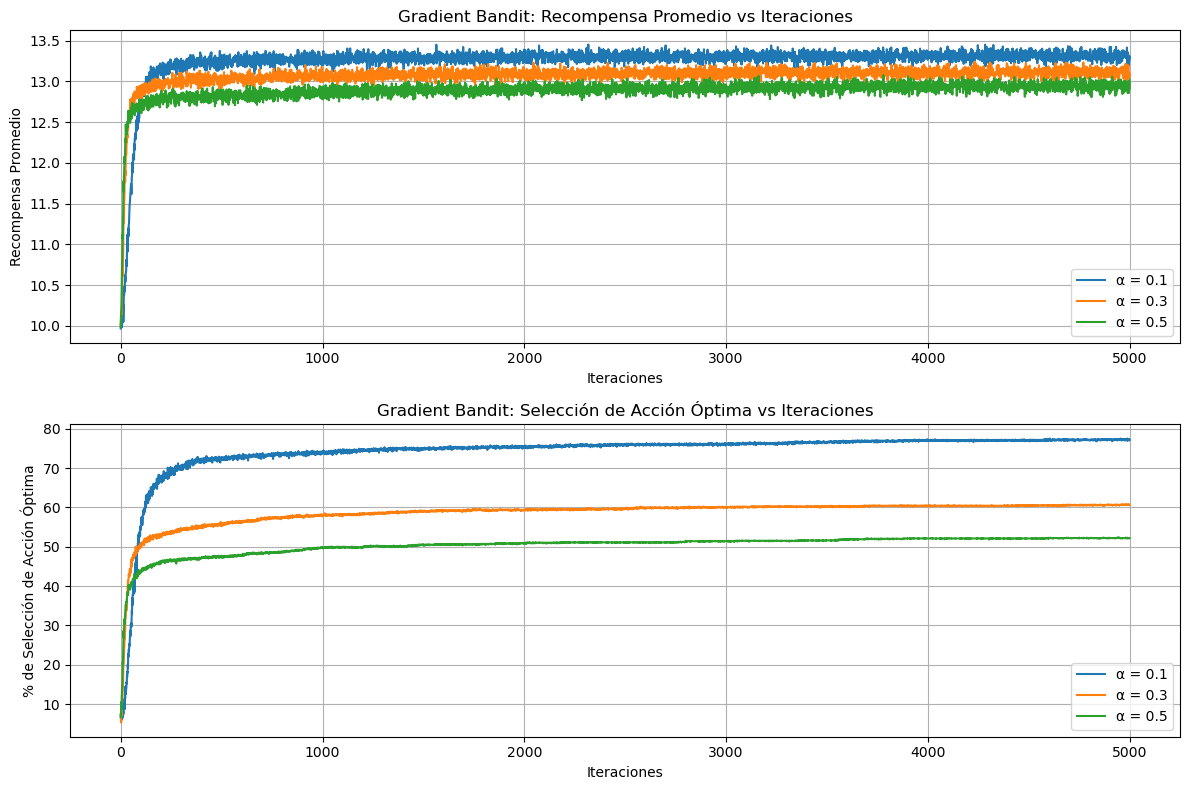

In [24]:
plt.figure(figsize=(12, 8))

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for alpha, (recompensa, _) in resultados_gradient.items():
    plt.plot(recompensa, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Gradient Bandit: Recompensa Promedio vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for alpha, (_, porcentaje_optimo) in resultados_gradient.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}', linewidth=1.5)
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Gradient Bandit: Selección de Acción Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

Ahorá, realizamos la comparación para el algoritmo de gradient bandit con los resultados del punto 1 y 2

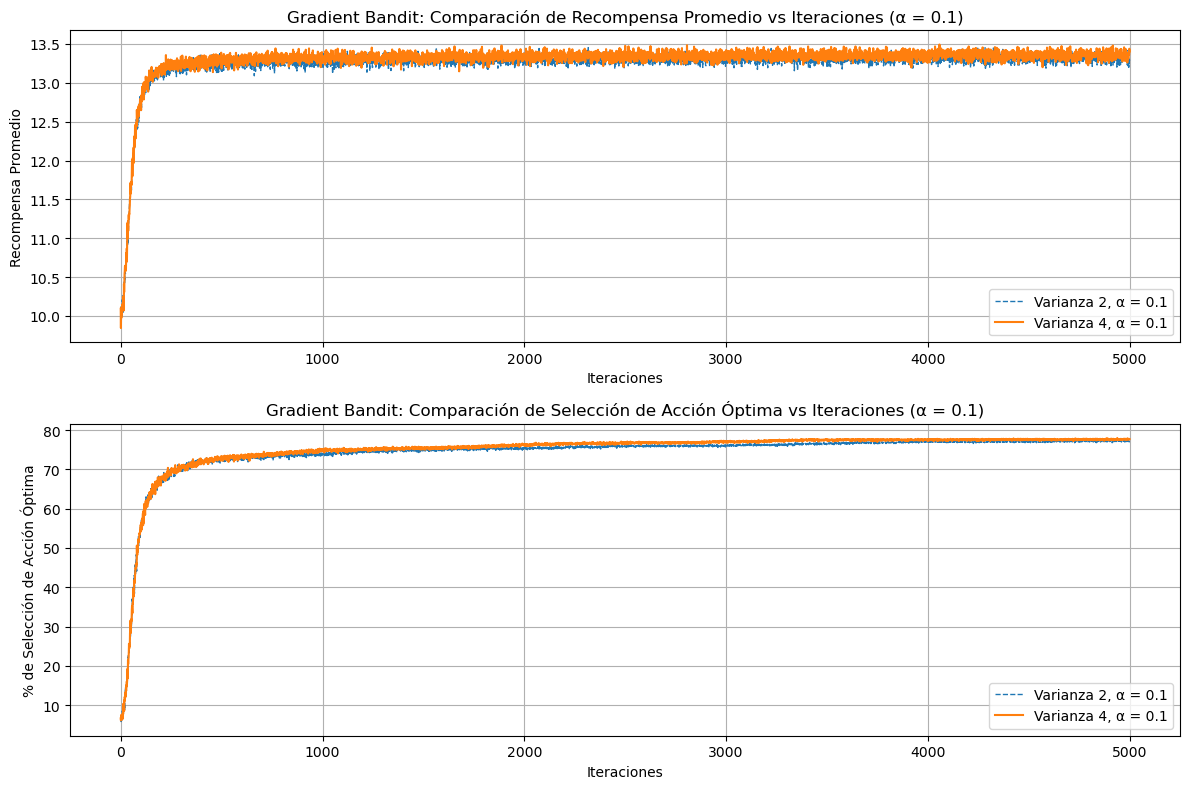

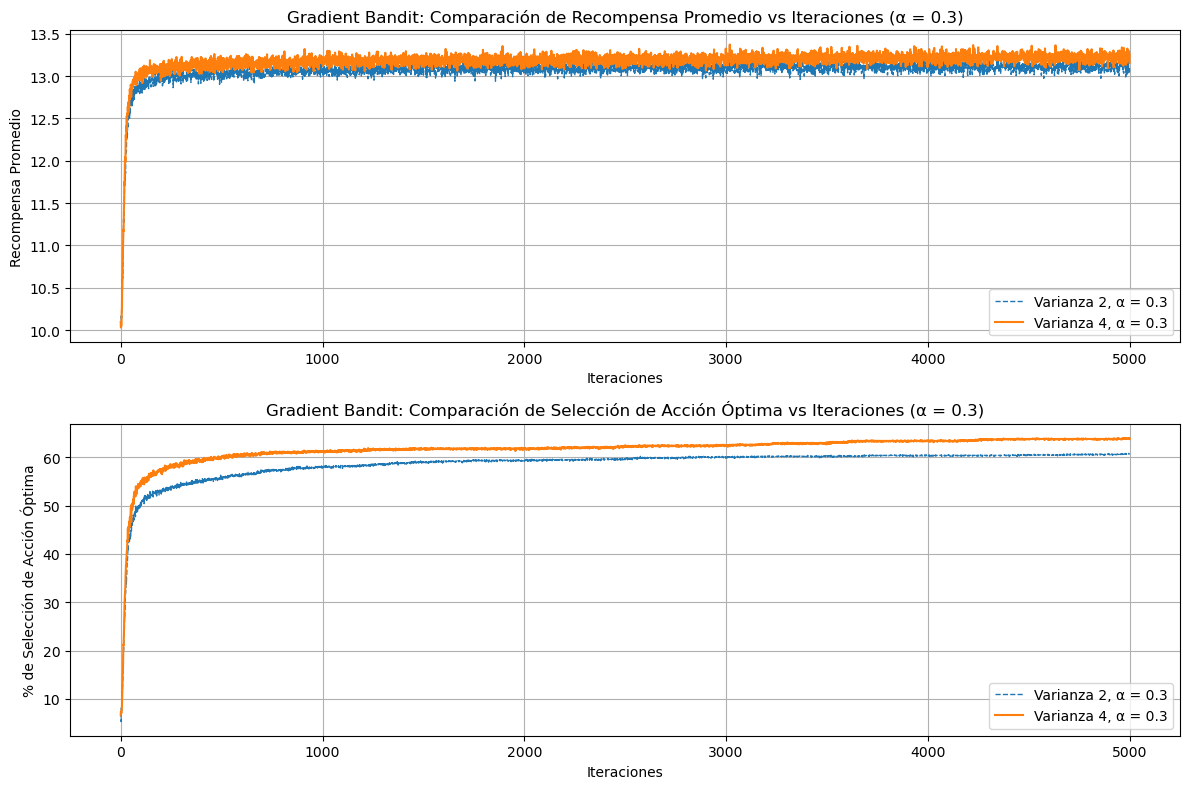

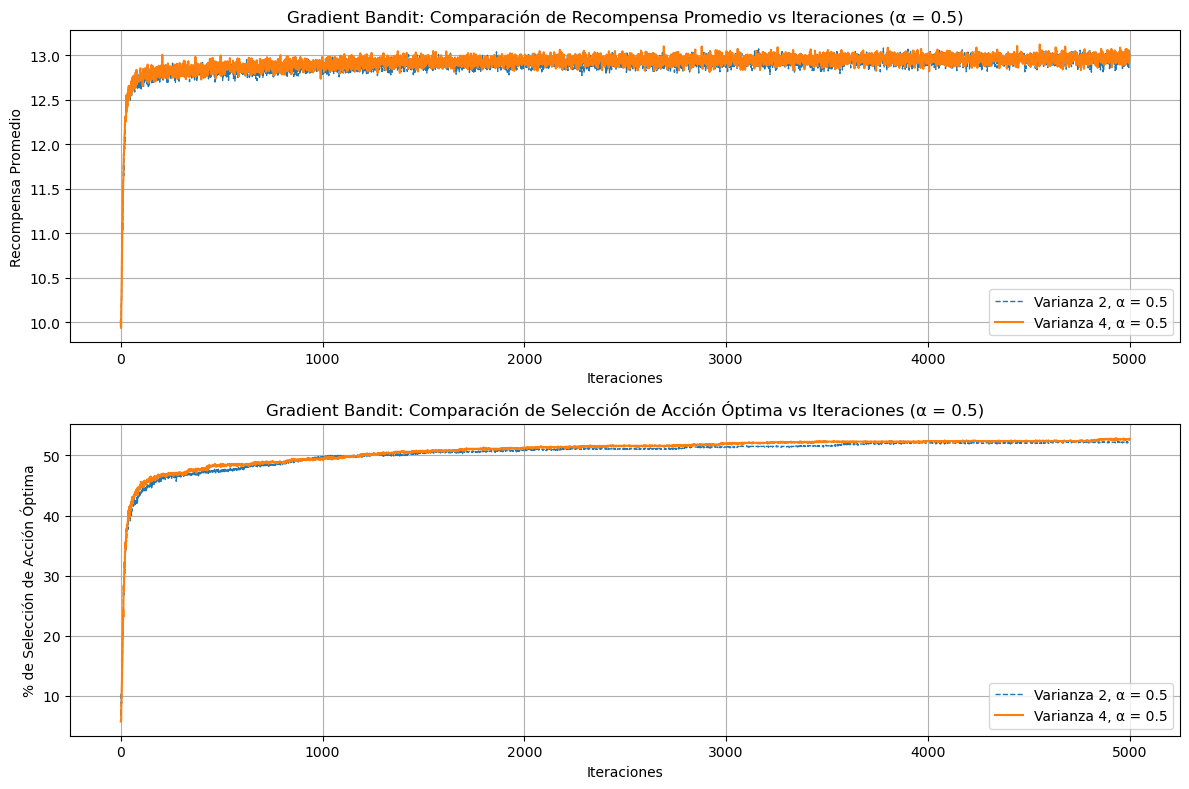

In [25]:
def comparar_resultados_gradient_bandit(resultados1, resultados2, alphas):
    for alpha in alphas:
        plt.figure(figsize=(12, 8))
        
        # Subgráfica 1: Comparación de recompensas promedio
        plt.subplot(2, 1, 1)
        plt.plot(resultados1[alpha][0], '--', label=f'Varianza 2, α = {alpha}', linewidth=1)
        plt.plot(resultados2[alpha][0], label=f'Varianza 4, α = {alpha}', linewidth=1.5)
        plt.xlabel('Iteraciones')
        plt.ylabel('Recompensa Promedio')
        plt.title(f'Gradient Bandit: Comparación de Recompensa Promedio vs Iteraciones (α = {alpha})')
        plt.legend(loc='best')
        plt.grid(True)

        # Subgráfica 2: Comparación del porcentaje de acción óptima seleccionada
        plt.subplot(2, 1, 2)
        plt.plot(resultados1[alpha][1] * 100, '--', label=f'Varianza 2, α = {alpha}', linewidth=1)
        plt.plot(resultados2[alpha][1] * 100, label=f'Varianza 4, α = {alpha}', linewidth=1.5)
        plt.xlabel('Iteraciones')
        plt.ylabel('% de Selección de Acción Óptima')
        plt.title(f'Gradient Bandit: Comparación de Selección de Acción Óptima vs Iteraciones (α = {alpha})')
        plt.legend(loc='best')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

comparar_resultados_gradient_bandit(resultados_gradient, resultados_gradient2, alphasBandits)

## _Punto 3:_

Considere un problema como el primer numeral en el que ahora cada T interaciones se cambia el multi-armed Bandit (es decir se generan de nuevo los valores de  $𝑞^∗(𝑎_𝑘)$). Utilice el algoritmo ϵ-greedy como tamaño de paso constante 𝛼 para resolver este problema en los siguientes casos:

- T = 80
- T = 500

Halle expementalmente el valor de 𝛼 en cada caso.



En este caso los valores iniciales son iguales a los que se presentan en el punto 1.

In [9]:
k = 15 # Número de acciones
promedio = 10 # promedio q*(ak)
varianza_r = 4 # varainza q*(ak)
var_recompensa = 2 # varianza de las recompensas
iteraciones = 5000 # numero de iteraciones
num_experimentos = 1000 # número de experimentos

Para este problema se modifica la función previamante creada, en este caso la funcion va a recibir el parametro T para identificar cada cuando debe reiniciar los valores de $𝑞^∗(𝑎_𝑘)$. 

Cada $T$ iteraciones, el entorno cambia, lo que implica que los valores verdaderos $q^*(a)$ se regeneran aleatoriamente siguiendo una distribución normal 

$$ q^*(a) \sim \mathcal{N}(\mu, \sigma^2) $$ 

con $\mu = 10$ y $\sigma^2 = 4$

Este cambio ocurre cuando se cumple la condición $t \mod T = 0$, lo que significa que cada $T$ pasos se redefinen los valores de recompensa esperada, simulando un entorno no estacionario. Además, la acción óptima $A^*_t$ se actualiza de acuerdo con:

$$ A^*_t = \arg\max_{a} q^*(a) $$

asegurando que el agente deba adaptarse continuamente a los nuevos valores de recompensa. Esta nueva aproximación del ejercicio, puede representar un reto adicional en el dilema de la exploración-explotación, ya que el agente debe ajustar sus estimaciones conforme el entorno cambia periódicamente cada iteración de T.

In [10]:
def epsilon_greedy2(epsilon, alpha, T):
    # Inicialización
    recompensa_promedio = np.zeros(iteraciones) # Guarda la recompensa promedio en cada iteración.
    accion_optima_recuento = np.zeros(iteraciones) # Guarda el número de veces que se elige la acción óptima.

    # Se generan los valores verdaderos 𝑞∗(𝑎) de las 15 acciones
    for _ in range(num_experimentos):
        q_valores_verdaderos = valores_verdaderos_q()
        q_estimado = np.zeros(k)
        accion_optima = np.argmax(q_valores_verdaderos)
        
        for t in range(iteraciones):

            # En esta parte se reinician los valores de los experimentos cada T iteraciones (aqí se trabajará con las 2 condiciones establecidas en el problema)
            if t % T == 0:
                q_valores_verdaderos = valores_verdaderos_q()
                accion_optima = np.argmax(q_valores_verdaderos)

            # Selección de acción
            if np.random.rand() < epsilon:
                accion = np.random.choice(k)  # Exploración: se elige una acción al azar
            else:
                accion = np.argmax(q_estimado)  # Explotación: se elige la mejor acción conocida

            # Generar recompensa y actualizar estimado
            recompensa = valores_recompensa(q_valores_verdaderos, accion)
            q_estimado[accion] += alpha * (recompensa - q_estimado[accion])

            # Actualizar recompensas promedio
            recompensa_promedio[t] += recompensa
            if accion == accion_optima:
                accion_optima_recuento[t] += 1

    # Se calcula el promedio de recompensas y porcentaje de selección de la acción óptima tras ejecutar 1000 experimentos.
    recompensa_promedio /= num_experimentos
    accion_optima_recuento /= num_experimentos

    return recompensa_promedio, accion_optima_recuento

Se definen valores de alpha, epsilon y T = 80 para crear el en el testbed. Para este caso se prueba con varias tasas de aprendizaje dado que es el parametro que se quiere calibrar para obtener los mejores resultados, dejando un valor 𝜖 constante.

In [11]:
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]  # Diferentes tasas de aprendizaje
epsilons = [0.01] # en esta parte se pueden cambiar los valores de epsilon
T = [80]

Se ejecutan los experimetos para cada combinacion posible de los valores de 𝛼, 𝜖 y T = 80, luego estos valores se almacenan dentro de un diccionario para realizar las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones.

In [12]:
def obtener_resultados(alphas, epsilons, T):
    res = {}
    for alpha in alphas:
        for epsilon in epsilons:
            for t in T:    
                key = (alpha, epsilon, t)  # Se crea una clave única para cada combinación de parámetros 𝛼 y 𝜖
                res[key] = epsilon_greedy2(epsilon, alpha, t)  # Genera resultados para cada combinación
    return res

resultados = obtener_resultados(alphas, epsilons, T)

Se realizán las graficas del testbed para contrastar los resultados de recompensa promedio y selección de acción optima durante las iteraciones.

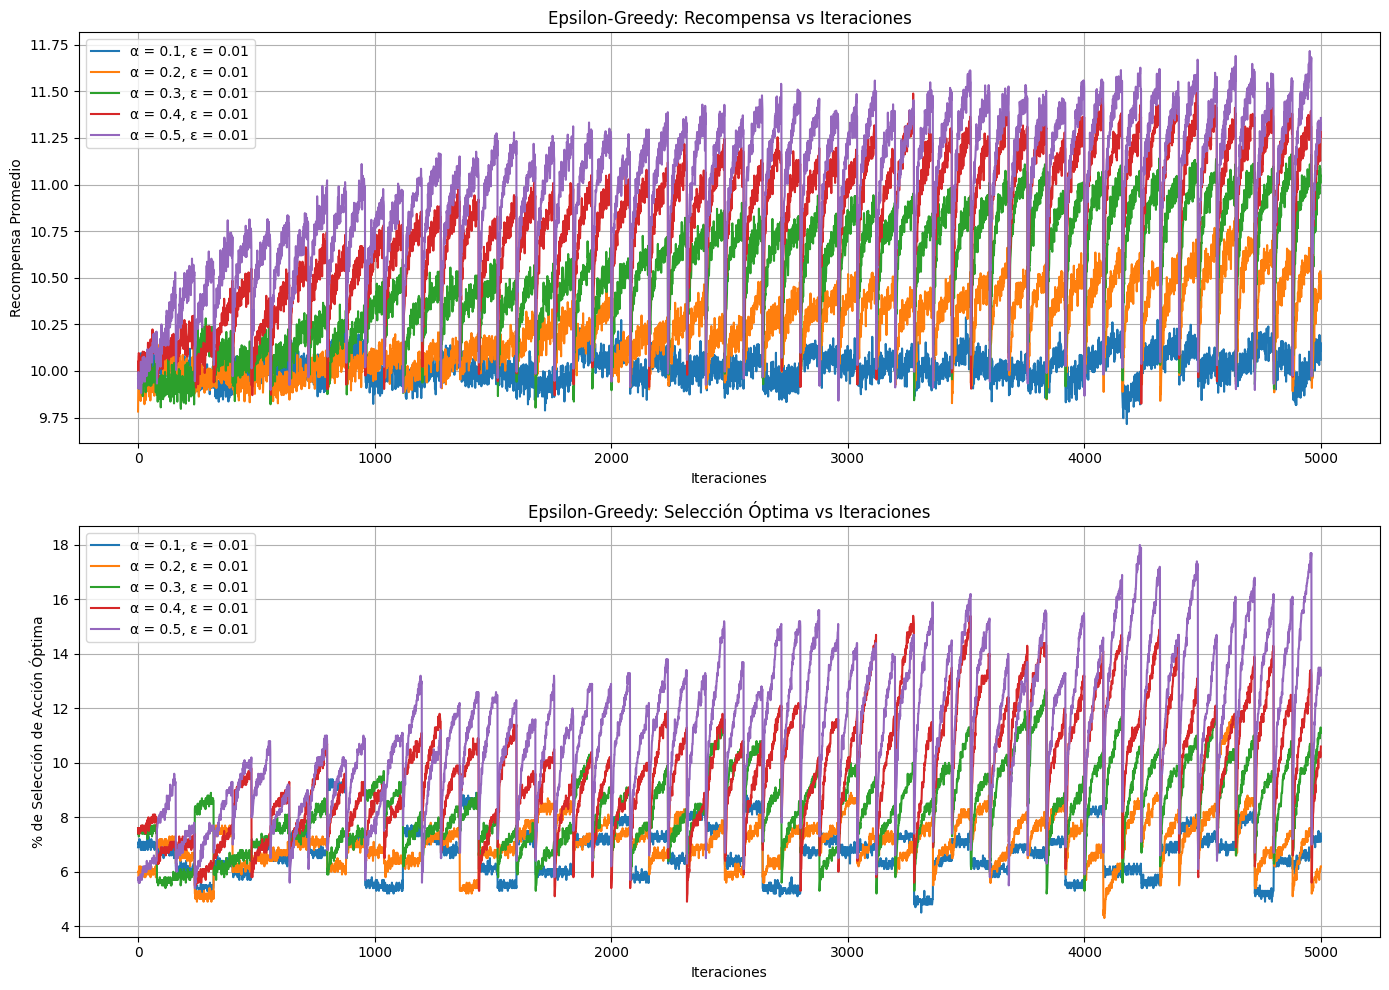

In [13]:
plt.figure(figsize=(14, 10))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for (alpha, epsilon, T), (recompensa, _) in resultados.items():
    plt.plot(recompensa, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for (alpha, epsilon, T), (_, porcentaje_optimo) in resultados.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

A continuación, se realiza la misma prueba, pero esta vez, cambiando el valor de T = 500 para contrastar los resultados obtenidos previamente.

In [14]:
T = [500]

Se ejecutan los experimetos para cada combinacion posible de los valores de 𝛼, 𝜖 y T = 500, luego estos valores se almacenan dentro de un diccionario para realizar las graficas del testbed para contrastar los resultados de recompensas y selección optima durante las iteraciones.

In [15]:
def obtener_resultados(alphas, epsilons, T):
    res = {}
    for alpha in alphas:
        for epsilon in epsilons:
            for t in T:    
                key = (alpha, epsilon, t)  # Se crea una clave única para cada combinación de parámetros 𝛼 y 𝜖
                res[key] = epsilon_greedy2(epsilon, alpha, t)  # Genera resultados para cada combinación
    return res

resultados = obtener_resultados(alphas, epsilons, T)

Se realizán las graficas del testbed para contrastar los resultados de recompensa promedio y selección de acción optima durante las iteraciones.

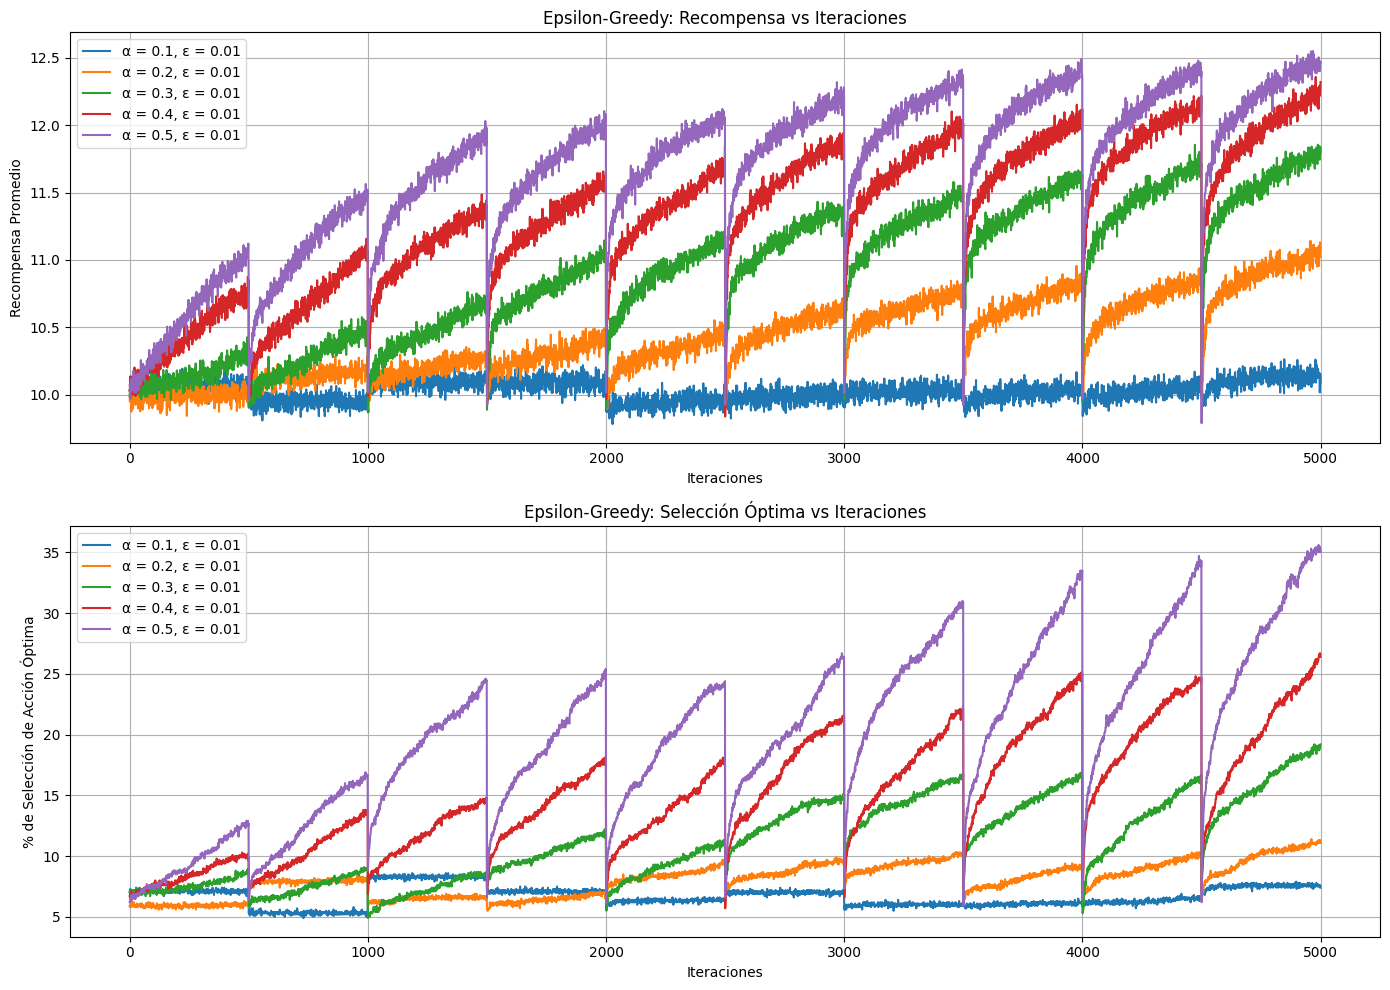

In [16]:
plt.figure(figsize=(14, 10))  # Ajustar el tamaño para mejor visibilidad

# Subgráfica 1: Recompensa promedio
plt.subplot(2, 1, 1)
for (alpha, epsilon, T), (recompensa, _) in resultados.items():
    plt.plot(recompensa, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Línea más gruesa
plt.xlabel('Iteraciones')
plt.ylabel('Recompensa Promedio')
plt.title('Epsilon-Greedy: Recompensa vs Iteraciones')
plt.legend(loc='best')  # Mejor ubicación de la leyenda
plt.grid(True)  # Agregar una cuadrícula

# Subgráfica 2: Porcentaje de selección de acción óptima
plt.subplot(2, 1, 2)
for (alpha, epsilon, T), (_, porcentaje_optimo) in resultados.items():
    plt.plot(porcentaje_optimo * 100, label=f'α = {alpha}, ε = {epsilon}', linewidth=1.5)  # Convertir a porcentaje
plt.xlabel('Iteraciones')
plt.ylabel('% de Selección de Acción Óptima')
plt.title('Epsilon-Greedy: Selección Óptima vs Iteraciones')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()  # Ajustar espacio entre gráficos
plt.show()

## _Conclusiones_

#### Punto 1

En este caso se logra estabilizar mas rapido el algoritmo de Gradient Bandits que el de ϵ-greedy, esto se debe a la forma a diferentes razones:
- En el caso de ϵ-greedy hace una estimacion de la recompensa promedio de cada acción , por lo cual es necesario esperar que se estabilice esta estimación. También, al tener el factor ϵ para poder hacer la exploración se puede tener ya estabilizada la recompensa pero tendra una probabilidad de elegir otra accion lo cual es un poco inificiente si ya se identifico la accion optima.
- En el caso del algoritmo de ϵ-greedy se observo que el tener valor de α grandes el algoritmos convergia mas rapido, esto se debe a que la estimacion se ajusta mas rapido pero se tienen variaciones fuertes que se observan en la grafica, en cambio con valores bajos la variacion es lenta lo que hace que el aprendizaje también lo sea.
- En el caso del algoritmo de Gradient Bandits no se hace una estacion de las recompensas, en este caso se actu alizan las preferencias evitando que se deba estabilizar las recompensas. También, con este algoritmo no se necesita explorar con parametro fijo dado que el algoritmo se adapta a medida que esta iterando dado mayores probabilidades a las mejores acciones.

#### Punto 2

En el primer caso al tener una varianza de 2 los cambios en el aprendizaje eran menores, en el segundo punto al aumentar la varianza a 4 la variaciones aumentan haciendo que el aprendizaje sea mas lento, en ambos casos se llego al optimo:
- Al tener una varianza alta es mejor tener valores de α bajos para que el aprendizaje sea mas estable y ϵ altos para que la exploracion aumente y se pueda tener certeza de que la acción seleccionada sea la mejor a largo plazo.
- Al tener una varianza baja es mejor tener valores de α altos para que el aprendizaje sea mas estable y ϵ bajos para que la exploracion disminuya dado que la varianza es baja se puede llegar de manera mas rapido al valor optimo, y en este caso la exploracion solo demoraria la convergencia del algoritmo ϵ-greedy
- De manera similar con una varianza alta el algoritmo Gradient Bandits presenta una convergencia mas lenta, esto se debe que para ajustar las preferencias este esta en funcion de la recompensa que se obtiene y si se tiene yna varianza grande este valor varia mucho causando que las preferencias en ciertos casos suban harto y en otros disminuyan, por eso convergio mas rapido y mas establemente en el primer punto.

#### Punto 3

- Se observa que el algoritmo ϵ-greedy en este caso se adapto a un entrono no estacionario dado que cada cierto paso T se reinciaban los valores de $q^*(a_k)$. Despues de cada paso T la recompensa promedio cae siempre, pero el agente tiene la capadidad de encontrar de nuevo la accion optima. Esto se debe a que el agente se queda con lo que aprendido que son las estimaciones las recompensas.
- En este caso a mayor tasa de aprendizaje el agente se adapta mas rapido a los cambios y tiene un mejor aprendizaje en ambos casos T = 80 y T = 500 los mejores resultados se encontraron con α = 0,5.

Como conclusión, el algotitmo ϵ-greedy sirve para entornos no estacionarios, pero el desempeño de este se ve afectado por la frecuencia de los cambios y por la elección de α.

## _Referencias_

Sutton, R. S., & Barto, A. G. (2020). *Reinforcement Learning: An Introduction* (2nd ed., revised). MIT Press. ISBN: 978-0262045446.
